In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
plt.rcParams['font.size'] = 16

# Prepping data

In [2]:
df = pd.read_csv('train.csv')
df_feature = df.drop('critical_temp', axis = 1)
variables = df_feature.columns
critical_temp = df['critical_temp']

In [3]:
atomic_mass_cols = ['mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass']
fie_cols = ['mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie']
atomic_radius_cols = ['mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius']
density_cols = ['mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density']
electron_affinity_cols = ['mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity']
fusion_heat_cols = ['mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat']
thermal_conducticity_cols = ['mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity']
valence_cols = ['mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
       'range_Valence', 'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence']

## train_test_split

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feature, critical_temp, test_size=0.2, random_state=42)

n_train = X_train.shape[0]
n_test = X_test.shape[0]
n_feats = X_train.shape[1]

print('number of observations in training set:', n_train)
print('number of observations in test set:', n_test)
print('number of features:', n_feats)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

number of observations in training set: 17010
number of observations in test set: 4253
number of features: 81


# Default Random Forest

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
forest_model = RandomForestRegressor(random_state=1, oob_score= True)
forest_model.fit(X_train, y_train)
print("Random Forest R2 score", forest_model.oob_score_)
print("Random Forest MSE", mean_squared_error(forest_model.predict(X_train), y_train))

Random Forest R2 score 0.9242305333555413
Random Forest MSE 24.704516252752658


In [303]:
forest_cv = RandomForestRegressor(random_state=1, oob_score= True)
cv_scores = cross_val_score(forest_cv, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
cv_scores2 = cross_val_score(forest_cv, X_train, y_train, scoring = 'r2', cv = 5)
print(cv_scores)
print(cv_scores.mean())
print(cv_scores2)
print(cv_scores2.mean())

[-106.34765426  -93.28142899  -86.32347265 -105.33149364  -89.06630309]
-96.07007052533682
[0.91103896 0.91933892 0.92351518 0.91346942 0.92537524]
0.9185475428615135


In [7]:
rf_val = forest_model.predict(X_val)
print("Random Forest MSE", mean_squared_error(rf_val, y_val))
print("Random Forest R2", r2_score(rf_val, y_val))

Random Forest MSE 111.9279156934366
Random Forest R2 0.893686547785855


In [8]:
residual = y_val - rf_val

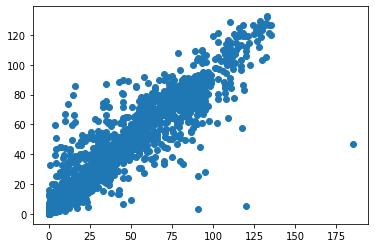

In [9]:
plt.scatter(y_val, rf_val)
plt.show()

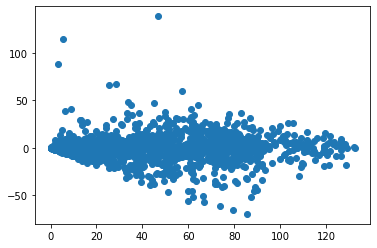

In [10]:
plt.scatter(rf_val, residual)
plt.show()

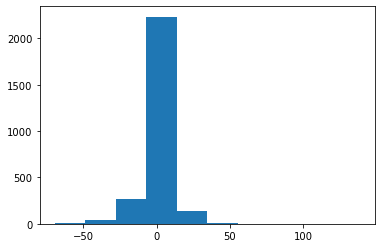

In [11]:
plt.hist(residual)
plt.show()

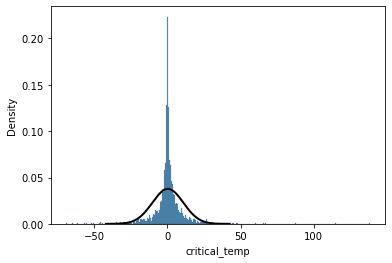

In [12]:
def normal(mean, std, color="black"):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = stats.norm.pdf(x, mean, std)
    z = plt.plot(x, p, color, linewidth=2)

data = residual  
ax = sns.histplot(x=data, stat="density")
normal(data.mean(), data.std()) # a matter of choice: whether I want most being 0 and have large errors on outliers, or if I want to take into account of the outliers

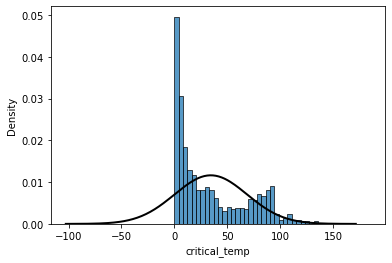

In [13]:
data = df['critical_temp'] 
ax = sns.histplot(x=data, stat="density")
normal(data.mean(), data.std())

## Hyperparameter Tuning
My understanding is that we start with random grid search to have a sense of range quickly, then we turn to the smaller range to do exhaustive grid search

In [14]:
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [262]:
rn_est = [i for i in range(10,1000,50)]
rmax_depth = [i for i in range(10,100,5)]
rmax_depth.append(None)
params = {"n_estimators" : rn_est, "max_depth" : rmax_depth, "max_features" : [i for i in range(3, 16)]}

In [20]:
forest_model = RandomForestRegressor(random_state=1, oob_score= True)
rf_model=RandomizedSearchCV(forest_model,param_distributions=params,scoring = 'neg_mean_squared_error', n_iter=15,n_jobs=-1,cv=5,verbose=3)
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=1),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60, 65,
                                                      70, 75, 80, 85, 90, 95,
                                                      None],
                                        'max_features': [3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13, 14,
                                                         15],
                                        'n_estimators': [10, 60, 110, 160, 210,
                                                         260, 310, 360, 410,
                                                         460, 510, 560, 610,
                                                     

In [21]:
rf_model.best_estimator_

RandomForestRegressor(max_depth=30, max_features=10, n_estimators=510,
                      oob_score=True, random_state=1)

In [25]:
rf_cv_results = pd.DataFrame.from_dict(rf_model.cv_results_)
rf_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,50.247632,0.701180,0.698781,0.031347,810,7,40,"{'n_estimators': 810, 'max_features': 7, 'max_...",-87.726298,-88.833482,-91.520954,-89.675581,-93.492924,-90.249848,2.041442,10
1,62.731598,0.639824,0.512648,0.053679,610,13,75,"{'n_estimators': 610, 'max_features': 13, 'max...",-88.026692,-88.586343,-91.001221,-88.816177,-92.996821,-89.885451,1.855348,6
2,42.398214,0.747558,0.424357,0.017143,510,10,30,"{'n_estimators': 510, 'max_features': 10, 'max...",-86.937056,-88.193448,-91.058235,-89.072368,-93.354210,-89.723064,2.258002,1
3,47.884189,1.230343,0.390277,0.031601,410,14,70,"{'n_estimators': 410, 'max_features': 14, 'max...",-88.007511,-88.789521,-91.591939,-89.250848,-93.145405,-90.157045,1.913166,8
4,29.424341,0.508539,0.707982,0.061094,810,3,65,"{'n_estimators': 810, 'max_features': 3, 'max_...",-88.907539,-89.316566,-92.273757,-92.053011,-94.779715,-91.466117,2.151444,13
5,47.530155,0.480266,0.227528,0.007866,610,15,10,"{'n_estimators': 610, 'max_features': 15, 'max...",-120.986120,-116.936280,-123.946547,-118.754839,-131.583596,-122.441477,5.135370,14
6,33.194846,1.024810,0.266005,0.022659,310,13,80,"{'n_estimators': 310, 'max_features': 13, 'max...",-88.363661,-88.845830,-91.232509,-88.771518,-93.174546,-90.077613,1.848544,7
7,91.553828,0.801138,0.869435,0.043934,860,12,30,"{'n_estimators': 860, 'max_features': 12, 'max...",-87.125209,-88.633365,-90.883478,-88.759307,-93.386284,-89.757528,2.173703,2
8,65.029516,2.169175,0.543981,0.032799,610,12,90,"{'n_estimators': 610, 'max_features': 12, 'max...",-87.245254,-88.330634,-91.259425,-88.876423,-93.526281,-89.847603,2.260200,5
9,63.646056,0.932147,0.661409,0.013943,710,10,65,"{'n_estimators': 710, 'max_features': 10, 'max...",-87.061114,-88.612459,-90.858519,-89.308883,-93.339914,-89.836178,2.135315,3


In [23]:
rf_model.best_score_

-89.7230636235775

The set of parameters this random search tried all have a large number of number of trees. Looking at the cross-validation results, we can see the high-ranking models have max_features around 10. In fact, models with max_feature = 10 rank 1, 3, 4, respectively. Since the increase of number of trees shouldn't cause overfitting, I conclude that the difference in score is caused by max_depth. As we can see, the model with the second-highest score has max_depth = 30, the same as the best model, despite that its max_feature is 12 instead of 10. Therefore, I conclude that the best model should have max_feature around 10, and max_depth around 30. There is still room for n_estimators to decrease. 

In [28]:
# Define parameter space for gridsearch
rn_est = [i for i in range(500,600,50)]
rmax_depth = [i for i in range(25,35,1)]
params = {"n_estimators" : rn_est, "max_depth" : rmax_depth, "max_features" : [i for i in range(8, 13)]}

In [29]:
forest_model = RandomForestRegressor(random_state=1, oob_score= True)
rf_model=GridSearchCV(forest_model,param_grid=params,scoring = 'neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
                         'max_features': [8, 9, 10, 11, 12],
                         'n_estimators': [500, 550]},
             scoring='neg_mean_squared_error', verbose=3)

In [30]:
rf_model.best_estimator_

RandomForestRegressor(max_depth=26, max_features=12, n_estimators=550,
                      oob_score=True, random_state=1)

In [31]:
rf_cv_results = pd.DataFrame.from_dict(rf_model.cv_results_)
rf_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,34.121128,0.262558,0.531874,0.061208,25,8,500,"{'max_depth': 25, 'max_features': 8, 'n_estima...",-88.058831,-88.793337,-91.888389,-88.758143,-93.942915,-90.288323,2.256693,83
1,38.771282,0.564762,0.486790,0.023810,25,8,550,"{'max_depth': 25, 'max_features': 8, 'n_estima...",-88.046464,-88.775306,-92.013311,-88.727665,-93.900067,-90.292563,2.270286,84
2,39.637939,0.411679,0.498301,0.077212,25,9,500,"{'max_depth': 25, 'max_features': 9, 'n_estima...",-87.898181,-89.117043,-91.181742,-89.297014,-93.732276,-90.245251,2.035539,82
3,44.948389,0.478923,0.519401,0.042563,25,9,550,"{'max_depth': 25, 'max_features': 9, 'n_estima...",-87.691767,-88.931213,-91.082697,-89.408417,-93.603580,-90.143535,2.043293,72
4,45.027759,0.828776,0.434000,0.057194,25,10,500,"{'max_depth': 25, 'max_features': 10, 'n_estim...",-87.704387,-88.085008,-91.276557,-89.049465,-93.364641,-89.896012,2.132458,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53.063652,0.829323,0.486803,0.025184,34,10,550,"{'max_depth': 34, 'max_features': 10, 'n_estim...",-87.352326,-88.709272,-91.014213,-89.590632,-92.788386,-89.890966,1.875528,32
96,48.870017,0.897341,0.425167,0.026604,34,11,500,"{'max_depth': 34, 'max_features': 11, 'n_estim...",-87.341315,-88.255664,-91.300501,-89.015862,-93.698396,-89.922348,2.298657,39
97,51.936351,0.334161,0.462512,0.022310,34,11,550,"{'max_depth': 34, 'max_features': 11, 'n_estim...",-87.249495,-88.205756,-91.143192,-89.020224,-93.656786,-89.855090,2.294277,21
98,53.279467,0.312940,0.439914,0.057356,34,12,500,"{'max_depth': 34, 'max_features': 12, 'n_estim...",-87.764521,-88.351629,-91.193785,-88.833606,-93.399891,-89.908686,2.098460,36


In [32]:
rf_model.best_score_

-89.66500158728743

The best score after hyperparameter tuning is MSE = 89.665 (RMSE = 9.469). Not much of a difference from the randomnized grid search. The default model MSE is 111.9279156934366 (RMSE = 10.580). This is a good improvement. Now we fit the model with the best parameters and evaluate the residuals.

In [263]:
forest_model = RandomForestRegressor(max_depth=26, max_features=12, n_estimators=550,
                      oob_score=True, random_state=1, n_jobs = -1)
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=26, max_features=12, n_estimators=550,
                      n_jobs=-1, oob_score=True, random_state=1)

In [36]:
print("Random Forest R2 score", forest_model.oob_score_)
print("Random Forest MSE", mean_squared_error(forest_model.predict(X_train), y_train))

Random Forest R2 score 0.9277901231360274
Random Forest MSE 24.136982395365134


In [265]:
rf_test = forest_model.predict(X_test)
print("Random Forest R2", r2_score(rf_test, y_test))
print("Random Forest MSE", mean_squared_error(rf_test, y_test))

Random Forest R2 0.9237135762597345
Random Forest MSE 79.98383161178039


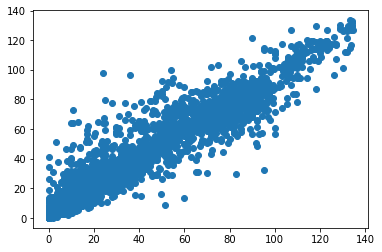

In [266]:
residual = y_test - rf_test
plt.scatter(y_test, rf_test)
plt.show()

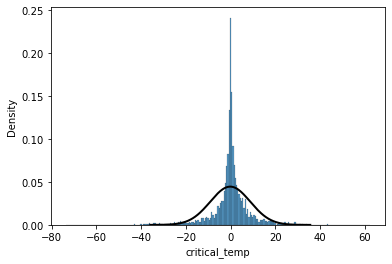

In [267]:
data = residual  
ax = sns.histplot(x=data, stat="density")
normal(data.mean(), data.std()) # a matter of choice: whether I want most being 0 and have large errors on outliers, or if I want to take into account of the outliers

### Checking performance on high temperatures

The model still doesn't do well on the high critical temperatures. Maybe I can calculate the MSE for y_val > 100 and y_val < 100. 

In [284]:
val_y_pred = y_test.to_frame()
val_y_pred['rf_val'] = rf_test
val_y_pred_g = val_y_pred.loc[val_y_pred['critical_temp'] > 77] # use liquid nitrogen as benchmark
val_y_pred_s = val_y_pred.loc[val_y_pred['critical_temp'] <= 77]
val_y_pred_0 = val_y_pred.loc[val_y_pred['critical_temp'] <= 4]
print(len(val_y_pred_g))
print(len(val_y_pred_s))

761
3492


In [285]:
print("Random Forest MSE in higher than 77 critical temp", mean_squared_error(val_y_pred_g['rf_val'], val_y_pred_g['critical_temp']))
print("Random Forest MSE in lower than 77 critical temp", mean_squared_error(val_y_pred_s['rf_val'], val_y_pred_s['critical_temp']))
print("Random Forest R2 in higher than 77 critical temp", r2_score(val_y_pred_g['rf_val'], val_y_pred_g['critical_temp']))
print("Random Forest R2 in lower than 77 critical temp", r2_score(val_y_pred_s['rf_val'], val_y_pred_s['critical_temp']))

Random Forest MSE in higher than 77 critical temp 118.30010606941326
Random Forest MSE in lower than 77 critical temp 71.63369276233635
Random Forest R2 in higher than 77 critical temp 0.4650146774694295
Random Forest R2 in lower than 77 critical temp 0.8581589464502553


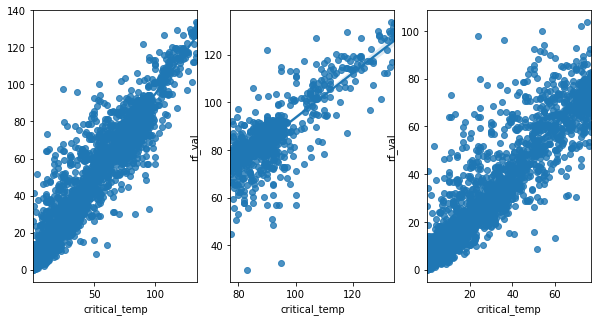

In [271]:
fig, axes = plt.subplots(1,3, figsize = (10,5))
ax1 = axes[0]
sns.regplot(ax = ax1, x = y_test, y = rf_test)
ax2 = axes[1]
sns.regplot(ax = ax2, x = val_y_pred_g['critical_temp'], y = val_y_pred_g['rf_val'])
ax3 = axes[2]
sns.regplot(ax = ax3, x = val_y_pred_s['critical_temp'], y = val_y_pred_s['rf_val'])
plt.show()

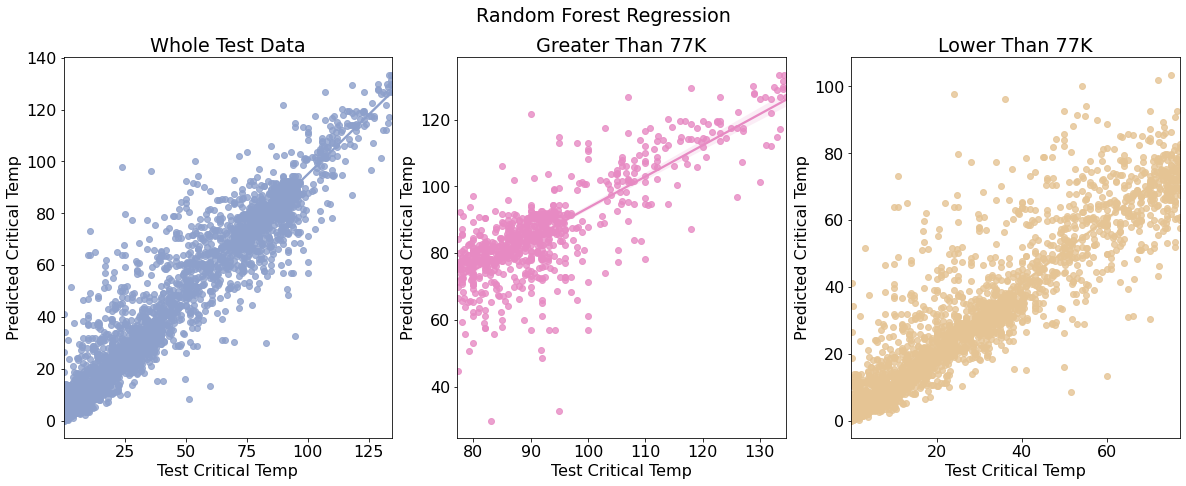

In [286]:
fig, axes = plt.subplots(1,3, figsize = (20,7))
ax1 = axes[0]
sns.regplot(ax = ax1, x = y_test, y = val_y_pred['rf_val'], color = sns.color_palette("Set2")[2])
ax1.set_xlabel('Test Critical Temp')
ax1.set_ylabel('Predicted Critical Temp')
ax1.set_title('Whole Test Data')
ax2 = axes[1]
sns.regplot(ax = ax2, x = val_y_pred_g['critical_temp'], y = val_y_pred_g['rf_val'], color = sns.color_palette("Set2")[3])
ax2.set_xlabel('Test Critical Temp')
ax2.set_ylabel('Predicted Critical Temp')
ax2.set_title('Greater Than 77K')
ax3 = axes[2]
sns.regplot(ax = ax3, x = val_y_pred_s['critical_temp'], y = val_y_pred_s['rf_val'], color = sns.color_palette("Set2")[6])
ax3.set_xlabel('Test Critical Temp')
ax3.set_ylabel('Predicted Critical Temp')
ax3.set_title('Lower Than 77K')
fig.suptitle('Random Forest Regression')
plt.savefig('rf_tp.pdf', bbox_inches = 'tight')

So the model works very badly on high critical temperatures. This may be due to the imbalance of the dataset. Also, maybe whether certain elements are in the material also play a role, we should try to check it as well.

# Default XGBoost

In [305]:
from xgboost import XGBRegressor
import xgboost

xg_model = XGBRegressor(random_state = 1)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
xg_val = xg_model.predict(X_val)
print("XGBoost MSE", mean_squared_error(xg_val, y_val))
print("XGBoost R2", r2_score(xg_val, y_val))

XGBoost MSE 118.1331043985006
XGBoost R2 0.8888463143355392


In [80]:
val_y_pred = y_val.to_frame()
val_y_pred['xg_val'] = xg_val
val_y_pred_g = val_y_pred.loc[val_y_pred['critical_temp'] > 77] # use liquid nitrogen as benchmark
val_y_pred_s = val_y_pred.loc[val_y_pred['critical_temp'] <= 77]
val_y_pred_0 = val_y_pred.loc[val_y_pred['critical_temp'] <= 4]
print(len(val_y_pred_g))
print(len(val_y_pred_s))

500
2211


In [81]:
print("Random Forest MSE in higher than 77 critical temp", mean_squared_error(val_y_pred_g['xg_val'], val_y_pred_g['critical_temp']))
print("Random Forest MSE in lower than 77 critical temp", mean_squared_error(val_y_pred_s['xg_val'], val_y_pred_s['critical_temp']))
print("Random Forest R2 in higher than 77 critical temp", r2_score(val_y_pred_g['xg_val'], val_y_pred_g['critical_temp']))
print("Random Forest R2 in lower than 77 critical temp", r2_score(val_y_pred_s['xg_val'], val_y_pred_s['critical_temp']))

Random Forest MSE in higher than 77 critical temp 253.04233855994326
Random Forest MSE in lower than 77 critical temp 87.6244580481065
Random Forest R2 in higher than 77 critical temp 0.18447139741207264
Random Forest R2 in lower than 77 critical temp 0.8280239121685818


## Default XGboost with rmsle

In [76]:
xg_model_log = XGBRegressor(random_state = 1, eval_metric = 'rmsle')
xg_model_log.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmsle',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [82]:
xg_val_log = xg_model_log.predict(X_val)
print("XGBoost MSE", mean_squared_error(xg_val_log, y_val))
print("XGBoost R2", r2_score(xg_val_log, y_val))

XGBoost MSE 118.1331043985006
XGBoost R2 0.8888463143355392


In [83]:
val_y_pred['xg_val_log'] = xg_val
val_y_pred_g = val_y_pred.loc[val_y_pred['critical_temp'] > 77] # use liquid nitrogen as benchmark
val_y_pred_s = val_y_pred.loc[val_y_pred['critical_temp'] <= 77]
val_y_pred_0 = val_y_pred.loc[val_y_pred['critical_temp'] <= 4]
print(len(val_y_pred_g))
print(len(val_y_pred_s))

500
2211


In [84]:
print("Random Forest MSE in higher than 77 critical temp", mean_squared_error(val_y_pred_g['xg_val_log'], val_y_pred_g['critical_temp']))
print("Random Forest MSE in lower than 77 critical temp", mean_squared_error(val_y_pred_s['xg_val_log'], val_y_pred_s['critical_temp']))
print("Random Forest R2 in higher than 77 critical temp", r2_score(val_y_pred_g['xg_val_log'], val_y_pred_g['critical_temp']))
print("Random Forest R2 in lower than 77 critical temp", r2_score(val_y_pred_s['xg_val_log'], val_y_pred_s['critical_temp']))

Random Forest MSE in higher than 77 critical temp 253.04233855994326
Random Forest MSE in lower than 77 critical temp 87.6244580481065
Random Forest R2 in higher than 77 critical temp 0.18447139741207264
Random Forest R2 in lower than 77 critical temp 0.8280239121685818


I don't see much difference in improving outliers when using RMSLE.

## Hyperparameter Tuning

I will try to use Baysian Optimization methods for hyperparameter tuning. It is supposed to be more efficient and in general better at finding the best combination of hyperparameters. Bergstra et al's figure demostrates the how efficient a model-based optimization approach could be, compared to randomized search. In short the concept is to build a probabilistic model for the objective function, and try to find the best possible model in the true objective function. There are three common ways to build this probabilistic model (the surrogate function): Gaussian Processes, Random Forest Regressions, and Tree Parzen Estimators (TPE). (cite https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f). The selection function, which is how the next set of parameters are chosen, is commonly chosen to be the Expected Improvement. I'm not exactly sure which surrogate function to choose and what difference they pocess, but from my search online, most people use hyperopt with TPE. Maybe it's the most versatile, maybe it's the most easy to use, I don't know. But for now, I will be following the crowd and use hyperopt with TPE.


In [229]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 0,5),
       'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
        'reg_alpha' : hp.uniform('reg_alpha', 0,15),
        'reg_lambda' : hp.uniform('reg_lambda', 0,3),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.3, 1),
        'min_child_weight' : hp.uniform('min_child_weight', 0, 10),
        'n_estimators': hp.quniform('n_estimators', 100,600, 1)
    }

In [ ]:
params = {
 "n_estimators" : [50 * i for i in range(1, 17)],
 "learning_rate" : [0.05 * i for i in range(1, 10)], # default 0.3
 "max_depth" : [ 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], # default 6
 "min_child_weight" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7 ], # default = 1, the greater the more conservative
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], # control how conservative the model is, default = 0, the greater gamma, the more conservative
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.6, 0.7, 0.8, 0.9, 1 ] # default = 1. the subsample ratio of columns for each tree. Subsampling occurs once for every tree constructed
}

In [228]:
# Define objective function with an emphasize on lowering mse on the high temperatures
def objective_g(space):
    xg_model=XGBRegressor(
                    n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                    learning_rate = space['learning_rate'], reg_alpha = space['reg_alpha'],min_child_weight=space['min_child_weight'],
                    colsample_bytree=int(space['colsample_bytree']), random_state = 1)
    #eval_set=evaluation
    evaluation = [( X_train, y_train), ( X_val, y_val)]
    
    xg_model.fit(X_train, y_train, eval_set=evaluation, eval_metric = 'rmse',verbose=False)
    

    pred = xg_model.predict(X_val)
    val_y_df = y_val.to_frame()
    val_y_df['pred'] = pred
    val_y_df_g = val_y_df.loc[val_y_df['critical_temp'] > 77] # use liquid nitrogen as benchmark
    mse = mean_squared_error(pred, y_val)
    gmse = mean_squared_error(val_y_df_g['pred'], val_y_df_g['critical_temp'])
    print ("MSE SCORE:", mse)
    return {'loss': mse + 0.2 * gmse, 'status': STATUS_OK }

In [ ]:
def objective(space):
    xg_model = XGBRegressor(
                    n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                    learning_rate = space['learning_rate'], reg_alpha = space['reg_alpha'],min_child_weight=space['min_child_weight'],
                    colsample_bytree=int(space['colsample_bytree']), random_state = 1, eval_metric = 'rmse')
    cross_score = cross_val_score(xg_model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1).mean()
    print("MSE SCORE:", cross_score)
    return {'loss': -cross_score, 'status': STATUS_OK}

### My custimized objective function emphasizing perdicting the higher temps

In [230]:
trials_g = Trials()

best_hyperparams_g = fmin(fn = objective_g,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 200,
                        trials = trials_g)

MSE SCORE:                                             
163.55602062995027                                     
MSE SCORE:                                                                       
164.391391483918                                                                 
MSE SCORE:                                                                       
166.78708242833653                                                               
MSE SCORE:                                                                       
159.65491157101624                                                               
MSE SCORE:                                                                       
162.2809016686856                                                                
MSE SCORE:                                                                       
168.19355766480885                                                               
MSE SCORE:                                                          

In [231]:
print(best_hyperparams_g)

{'colsample_bytree': 0.7602846725449136, 'gamma': 2.9299239233788974, 'learning_rate': 0.09564613487898527, 'max_depth': 8.0, 'min_child_weight': 1.083841261027267, 'n_estimators': 544.0, 'reg_alpha': 6.62926834901879, 'reg_lambda': 0.3396243222623556}


In [235]:
xg_g = XGBRegressor(colsample_bytree =  0.7602846725449136, gamma =  2.9299239233788974, learning_rate = 0.09564613487898527, 
                        max_depth = 8, min_child_weight = 1.083841261027267, n_estimators = 544, reg_alpha = 6.62926834901879, 
                        reg_lambda = 0.3396243222623556, random_state = 1, eval_metric = 'rmse', n_jobs = -1)
xg_g.fit(X_train, y_train)

In [239]:
y_hyper_g = xg_g.predict(X_val)
val_y_pred = y_val.to_frame()
val_y_pred['xg_g'] = y_hyper_g
val_y_pred_g = val_y_pred.loc[val_y_pred['critical_temp'] > 77] # use liquid nitrogen as benchmark
val_y_pred_s = val_y_pred.loc[val_y_pred['critical_temp'] <= 77]
val_y_pred_0 = val_y_pred.loc[val_y_pred['critical_temp'] <= 4]
print(len(val_y_pred_g))
print(len(val_y_pred_s))

500
2211


<AxesSubplot:xlabel='critical_temp', ylabel='xg_g'>

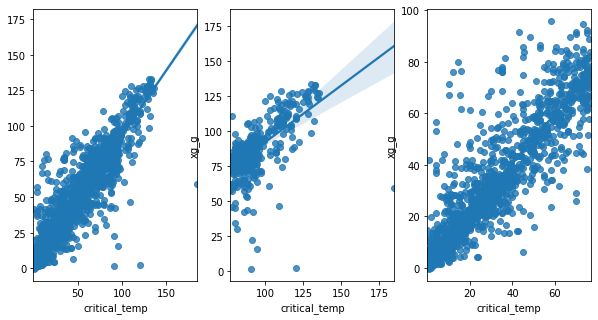

In [257]:
fig, axes = plt.subplots(1,3, figsize = (10,5))
ax1 = axes[0]
sns.regplot(ax = ax1, x = y_val, y = y_hyper_g)
ax2 = axes[1]
sns.regplot(ax = ax2, x = val_y_pred_g['critical_temp'], y = val_y_pred_g['xg_g'])
ax3 = axes[2]
sns.regplot(ax = ax3, x = val_y_pred_s['critical_temp'], y = val_y_pred_s['xg_g'])

### Result of customized objective tuning
Compared to normal XGBoost without customization, I don't see much difference. 

In [240]:
print("XGBoost Customize R2", r2_score(y_hyper_g, y_val))
print("XGBoost Customize MSE", mean_squared_error(y_hyper_g, y_val))
print("XGBoost Customize MSE in higher than 77 critical temp", mean_squared_error(val_y_pred_g['xg_g'], val_y_pred_g['critical_temp']))
print("XGBoost Customize R2 in higher than 77 critical temp", r2_score(val_y_pred_g['xg_g'], val_y_pred_g['critical_temp']))

XGBoost Customize R2 0.8964979111141873
XGBoost Customize MSE 111.8618037660882
XGBoost Customize MSE in higher than 77 critical temp 248.80510785799652
XGBoost Customize R2 in higher than 77 critical temp 0.21385188141993516


### TPE tuning

In [205]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 200,
                        trials = trials)

MSE SCORE:                                             
-139.31167765624767                                    
MSE SCORE:                                                                       
-167.3752491459407                                                               
MSE SCORE:                                                                       
-202.0985326892196                                                               
MSE SCORE:                                                                       
-200.26848759915188                                                              
MSE SCORE:                                                                       
-171.54996880388893                                                              
MSE SCORE:                                                                       
-161.95377499445266                                                              
MSE SCORE:                                                          

In [206]:
print(best_hyperparams)

{'colsample_bytree': 0.5487927208988037, 'gamma': 0.045397806280233155, 'learning_rate': 0.12280961588314324, 'max_depth': 5.0, 'min_child_weight': 6.048468541113024, 'n_estimators': 991.0, 'reg_alpha': 18.993362702278418, 'reg_lambda': 0.5989259109966538}


I will try to use Baysian Optimization methods for hyperparameter tuning. It is supposed to be more efficient and in general better at finding the best combination of hyperparameters. Bergstra et al's figure demostrates the how efficient a model-based optimization approach could be, compared to randomized search. In short the concept is to build a probabilistic model for the objective function, and try to find the best possible model in the true objective function. There are three common ways to build this probabilistic model (the surrogate function): Gaussian Processes, Random Forest Regressions, and Tree Parzen Estimators (TPE). (cite https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f). The selection function, which is how the next set of parameters are chosen, is commonly chosen to be the Expected Improvement. I'm not exactly sure which surrogate function to choose and what difference they pocess, but from my search online, most people use hyperopt with TPE. Maybe it's the most versatile, maybe it's the most easy to use, I don't know. But for now, I will be following the crowd and use hyperopt with TPE.


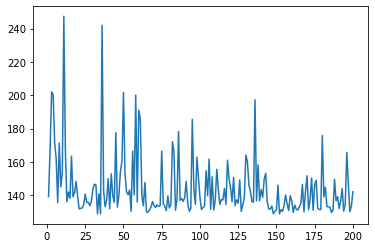

In [208]:
loss_list = [trials.results[i]['loss'] for i in range(0,200)]
plt.plot([i for i in range(1, 201)], loss_list)
plt.show()

In [209]:
xg_hyper = XGBRegressor(colsample_bytree = 0.5487927208988037, gamma =  0.045397806280233155, learning_rate = 0.12280961588314324, 
                        max_depth = 5, min_child_weight = 6.048468541113024, n_estimators = 991, reg_alpha = 18.993362702278418, 
                        reg_lambda = 0.5989259109966538, random_state = 1, eval_metric = 'rmse')
xg_hyper.fit(X_train, y_train)
y_hyper_pred = xg_hyper.predict(X_val)

In [210]:
print("XGBoost Baysian R2", r2_score(y_hyper_pred, y_val))
print("XGBoost Baysian MSE", mean_squared_error(y_hyper_pred, y_val))

XGBoost Baysian R2 0.8962317677200492
XGBoost Baysian MSE 111.44935626937837


In [169]:
params = {
 "n_estimators" : [50 * i for i in range(1, 17)],
 "learning_rate" : [0.05 * i for i in range(1, 10)], # default 0.3
 "max_depth" : [ 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], # default 6
 "min_child_weight" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7 ], # default = 1, the greater the more conservative
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], # control how conservative the model is, default = 0, the greater gamma, the more conservative
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.6, 0.7, 0.8, 0.9, 1 ] # default = 1. the subsample ratio of columns for each tree. Subsampling occurs once for every tree constructed
}

In [170]:
xg_model = XGBRegressor(random_state = 1, eval_metric = 'rmse')
xg_tuning=RandomizedSearchCV(xg_model,param_distributions=params,scoring = 'neg_mean_squared_error', n_iter=150,n_jobs=-1,cv=5,verbose=3)
xg_tuning.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          eval_metric='rmse', gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None...
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1,
                                              

In [191]:
xg_tuning.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0.3, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=6, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [192]:
xg_tuning.best_score_

-87.03129377010757

In [195]:
xg_cv_results = pd.DataFrame.from_dict(xg_tuning.cv_results_)
xg_cv_results.sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,83.650354,0.484193,0.170298,0.018743,500,6,10,0.05,0.3,0.8,"{'n_estimators': 500, 'min_child_weight': 6, '...",-84.206966,-83.072030,-91.255003,-84.545750,-92.076720,-87.031294,3.824306,1
20,39.601144,0.421712,0.157443,0.021629,200,4,15,0.05,0.4,0.6,"{'n_estimators': 200, 'min_child_weight': 4, '...",-83.926911,-87.390652,-91.999257,-84.694210,-92.197123,-88.041630,3.506874,2
60,100.005585,0.324001,0.401457,0.037212,650,6,15,0.05,0.4,0.5,"{'n_estimators': 650, 'min_child_weight': 6, '...",-83.919706,-88.535413,-90.933410,-87.676031,-91.817896,-88.576491,2.777046,3
7,47.951222,0.746971,0.102983,0.008463,200,7,13,0.05,0.4,0.9,"{'n_estimators': 200, 'min_child_weight': 7, '...",-85.823523,-87.467146,-92.381434,-84.825430,-94.496619,-88.998830,3.781893,4
39,11.622457,0.100252,0.066141,0.002728,100,0.7,12,0.05,0.3,0.4,"{'n_estimators': 100, 'min_child_weight': 0.7,...",-85.295629,-88.403450,-90.143564,-87.069446,-94.671614,-89.116741,3.200377,5


In [202]:
xg_random = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0.3, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=6,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
xg_random.fit(X_train, y_train)
y_random_pred = xg_random.predict(X_val)

In [203]:
print("XGBoost Random R2", r2_score(y_random_pred, y_val))
print("XGBoost Random MSE", mean_squared_error(y_random_pred, y_val))

XGBoost Random R2 0.8979745377616277
XGBoost Random MSE 109.9522378795728


There is actually a wide range in the parameters in the first few places. min_child_weight ranges from 0.7 to 7. max_depth ranges from 10 to 15, close to the upper bound. learning_rate stays at 0.05 which is the default value. gama is from 0.3 to 0.4, around the default value and the left boundary, and colsample_bytree is 0.4 to 0.8. n_estimators ranging from 100 to 500.

In [295]:
params = {
 "learning_rate" : [0.05], # default 0.3
 "max_depth" : [10, 12, 15, 17], # default 6
 "min_child_weight" : [1, 2, 3, 4, 5, 6, 7 ], # default = 1, the greater the more conservative
 "gamma": [ 0.3, 0.4, 0.5, 0.6 ], # control how conservative the model is, default = 0, the greater gamma, the more conservative
 "colsample_bytree" : [ 0.4, 0.5 , 0.7, 0.8, 1] # default = 1. the subsample ratio of columns for each tree. Subsampling occurs once for every tree constructed
}

### Tune in a smaller range randomized

In [296]:
xg_model = xg_model = XGBRegressor(random_state = 1, eval_metric = 'rmse')
xg_tuning=RandomizedSearchCV(xg_model,param_distributions= params,scoring = 'neg_mean_squared_error',n_iter=50, n_jobs=-1,cv=5,verbose=3)
xg_tuning.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          eval_metric='rmse', gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None...
                                          random_state=1, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_weight

In [297]:
xg_tuning.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, eval_metric='rmse',
             gamma=0.3, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [298]:
xg_tuning.best_score_

-89.73552024863548

In [216]:
xg_cv_results = pd.DataFrame.from_dict(xg_tuning.cv_results_)
xg_cv_results.sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,17.735323,0.098003,0.080130,0.002289,7,17,0.05,0.3,0.5,"{'min_child_weight': 7, 'max_depth': 17, 'lear...",-83.144929,-87.171966,-89.352921,-85.783128,-92.257853,-87.542159,3.101080,1
26,16.155594,0.060108,0.070629,0.002761,7,15,0.05,0.5,0.5,"{'min_child_weight': 7, 'max_depth': 15, 'lear...",-82.608744,-87.544490,-89.362264,-86.511292,-91.878246,-87.581007,3.082472,2
15,16.547995,0.052087,0.077274,0.003332,5,15,0.05,0.5,0.5,"{'min_child_weight': 5, 'max_depth': 15, 'lear...",-83.056511,-87.859560,-89.747106,-86.357452,-92.043906,-87.812907,3.045860,3
2,13.831763,0.067200,0.083272,0.001786,4,15,0.05,0.6,0.4,"{'min_child_weight': 4, 'max_depth': 15, 'lear...",-83.214671,-86.814827,-90.535145,-87.039185,-92.038015,-87.928369,3.096257,4
21,16.730488,0.061433,0.079411,0.001067,4,15,0.05,0.5,0.5,"{'min_child_weight': 4, 'max_depth': 15, 'lear...",-82.751277,-89.248016,-90.698651,-85.455002,-91.815974,-87.993784,3.389036,5


The scores are very close, at this point, we will finalize the model

In [300]:
xg_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, eval_metric='rmse',
             gamma=0.3, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=5, 
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)

In [301]:
print("XGBoost R2", r2_score(xg_pred, y_test))
print("XGBoost MSE", mean_squared_error(xg_pred, y_test))

XGBoost R2 0.9263858795954237
XGBoost MSE 77.67763980763354


In [288]:
val_y_pred['xg_val'] = xg_pred
val_y_pred_g = val_y_pred.loc[val_y_pred['critical_temp'] > 77] # use liquid nitrogen as benchmark
val_y_pred_s = val_y_pred.loc[val_y_pred['critical_temp'] <= 77]
val_y_pred_0 = val_y_pred.loc[val_y_pred['critical_temp'] <= 4]
print(len(val_y_pred_g))
print(len(val_y_pred_s))

761
3492


In [274]:
print("XGBoost MSE in higher than 77 critical temp", mean_squared_error(val_y_pred_g['xg_val'], val_y_pred_g['critical_temp']))
print("XGBoost MSE in lower than 77 critical temp", mean_squared_error(val_y_pred_s['xg_val'], val_y_pred_s['critical_temp']))
print("XGBoost R2 in higher than 77 critical temp", r2_score(val_y_pred_g['xg_val'], val_y_pred_g['critical_temp']))
print("XGBoost R2 in lower than 77 critical temp", r2_score(val_y_pred_s['xg_val'], val_y_pred_s['critical_temp']))

XGBoost MSE in higher than 77 critical temp 115.67179254543544
XGBoost MSE in lower than 77 critical temp 69.01856960568077
XGBoost R2 in higher than 77 critical temp 0.48332553578828374
XGBoost R2 in lower than 77 critical temp 0.8620126705807516


Slightly better than random forest on higher temperatures

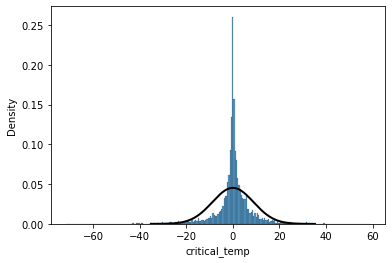

In [276]:
data = y_test - xg_pred 
ax = sns.histplot(x=data, stat="density")
normal(data.mean(), data.std()) 

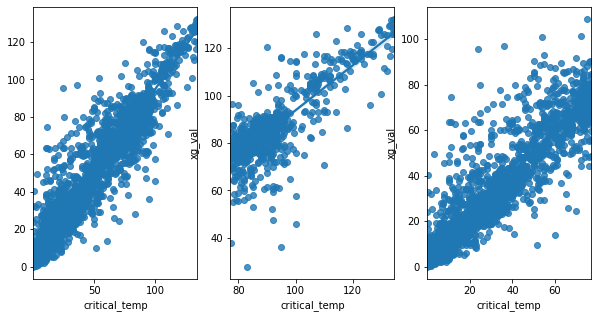

In [279]:
fig, axes = plt.subplots(1,3, figsize = (10,5))
ax1 = axes[0]
sns.regplot(ax = ax1, x = y_test, y = xg_pred)
ax2 = axes[1]
sns.regplot(ax = ax2, x = val_y_pred_g['critical_temp'], y = val_y_pred_g['xg_val'])
ax3 = axes[2]
sns.regplot(ax = ax3, x = val_y_pred_s['critical_temp'], y = val_y_pred_s['xg_val'])
plt.show()

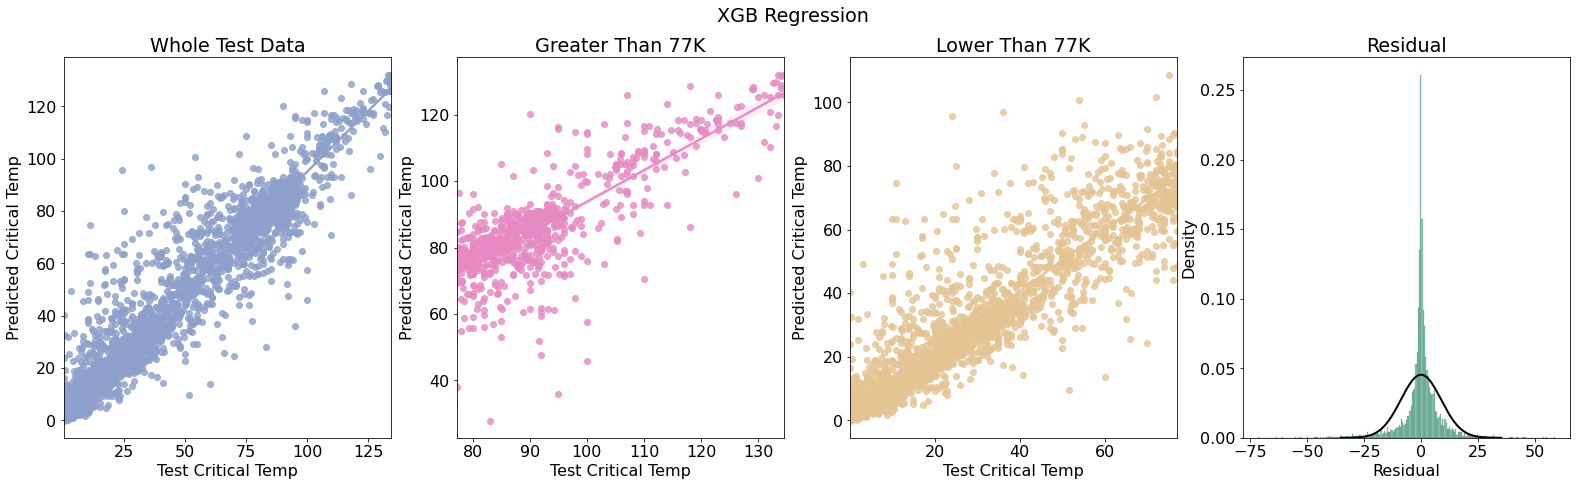

In [294]:
fig, axes = plt.subplots(1,4, figsize = (27,7))
ax1 = axes[0]
sns.regplot(ax = ax1, x = val_y_pred['critical_temp'], y = val_y_pred['xg_val'], color = sns.color_palette("Set2")[2])
ax1.set_xlabel('Test Critical Temp')
ax1.set_ylabel('Predicted Critical Temp')
ax1.set_title('Whole Test Data')
ax2 = axes[1]
sns.regplot(ax = ax2, x = val_y_pred_g['critical_temp'], y = val_y_pred_g['xg_val'], color = sns.color_palette("Set2")[3])
ax2.set_xlabel('Test Critical Temp')
ax2.set_ylabel('Predicted Critical Temp')
ax2.set_title('Greater Than 77K')
ax3 = axes[2]
sns.regplot(ax = ax3, x = val_y_pred_s['critical_temp'], y = val_y_pred_s['xg_val'], color = sns.color_palette("Set2")[6])
ax3.set_xlabel('Test Critical Temp')
ax3.set_ylabel('Predicted Critical Temp')
ax3.set_title('Lower Than 77K')
ax4 = axes[3]
sns.histplot(ax = ax4, x=data, stat="density", color = sns.color_palette("Set2")[0])
normal(data.mean(), data.std()) 
ax4.set_title('Residual')
ax4.set_xlabel('Residual')
ax4.set_ylabel('Density')
fig.suptitle('XGB Regression')
plt.savefig('xgb_tp.pdf', bbox_inches = 'tight')

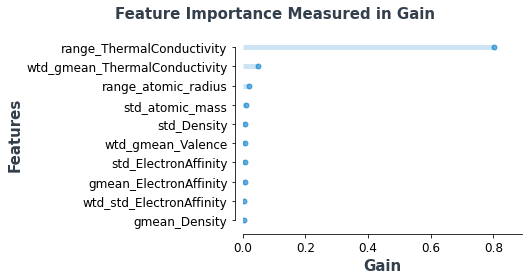

In [329]:
my_range=list(range(1,11))

fig, ax = plt.subplots(figsize=(5,3.5))

plt.hlines(y=my_range, xmin=0, xmax=xg_model.feature_importances_[sorted_idx][-10:], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(xg_model.feature_importances_[sorted_idx][-10:], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Gain', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('Features',fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df_feature.columns[sorted_idx][-10:])

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Feature Importance Measured in Gain', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, len(my_range)))
ax.set_xlim(0,0.89)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))
plt.savefig('xgb_fi.pdf', bbox_inches = 'tight')